<a href="https://colab.research.google.com/github/bsureshkrishna/qlsc600_2025/blob/main/lec3_PointProcesses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

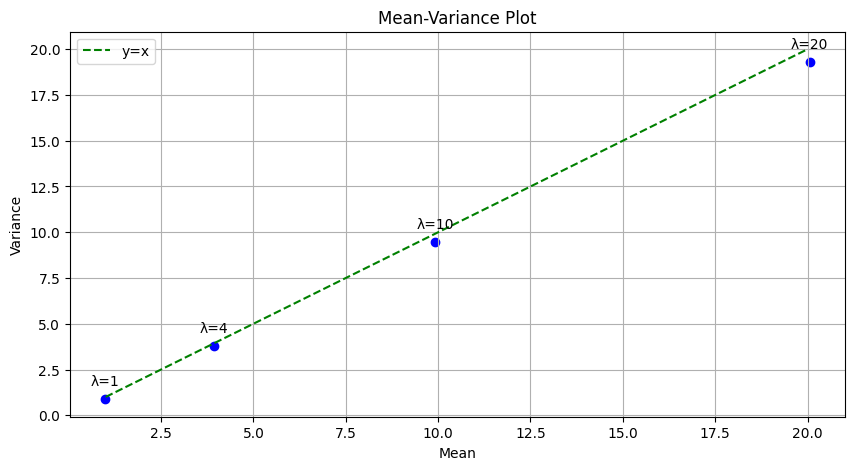

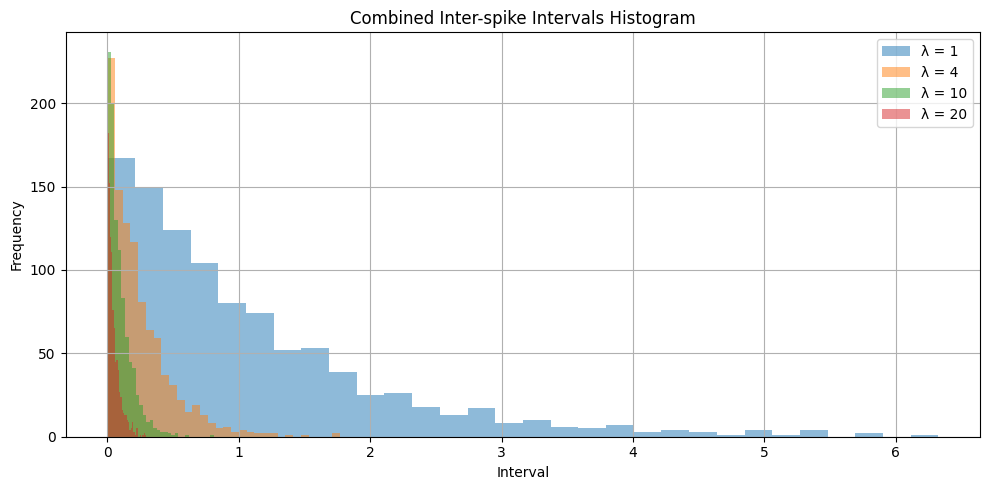

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, poisson

# Define the number of samples to generate for each Poisson process
n_samples = 1000

# Define different values for lambda (mean rate of the Poisson process)
lambdas = [1, 4, 10, 20]

# Initialize lists to hold means and variances
means = []
variances = []

# Simulate the Poisson process for each lambda
for lam in lambdas:
    # Generate n_samples from Poisson distribution with mean `lam`
    samples = np.random.poisson(lam=lam, size=n_samples)

    # Calculate the mean and variance for the samples
    mean = np.mean(samples)
    variance = np.var(samples)

    # Append the calculated mean and variance to the lists
    means.append(mean)
    variances.append(variance)

# Prepare the figure for combined mean-variance plot
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# Plot the means and variances on the same plot
ax1.scatter(means, variances, color='blue')
for i, lam in enumerate(lambdas):
    ax1.annotate(f'λ={lam}', (means[i], variances[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Plot the line y=x to represent where the mean equals the variance
ax1.plot(lambdas, lambdas, color='green', linestyle='--', label='y=x')

# Set labels and title
ax1.set_title('Mean-Variance Plot')
ax1.set_xlabel('Mean')
ax1.set_ylabel('Variance')
ax1.legend()
ax1.grid(True)

# Prepare the figure for combined inter-spike intervals histogram with shared axes
fig, ax2 = plt.subplots(1, 1, figsize=(10, 5))

# Plot the inter-spike intervals for each lambda on the same axes
for lam in lambdas:
    inter_spike_intervals = -np.log(1.0 - np.random.uniform(size=n_samples)) / lam
    ax2.hist(inter_spike_intervals, bins=30, alpha=0.5, label=f'λ = {lam}')

# Set labels and title for the inter-spike intervals histogram
ax2.set_title('Combined Inter-spike Intervals Histogram')
ax2.set_xlabel('Interval')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Note: The plt.show() command is omitted here since only the code was requested.
plt.show()

We now simulate an inhomogeneous Poisson process using the time-rescaling method. There are other methods as well.. e.g. thinning, that we will not cover here. For homogeneous processes, just simulating an exponential distribution for the inter-event times is perhaps the easiest.

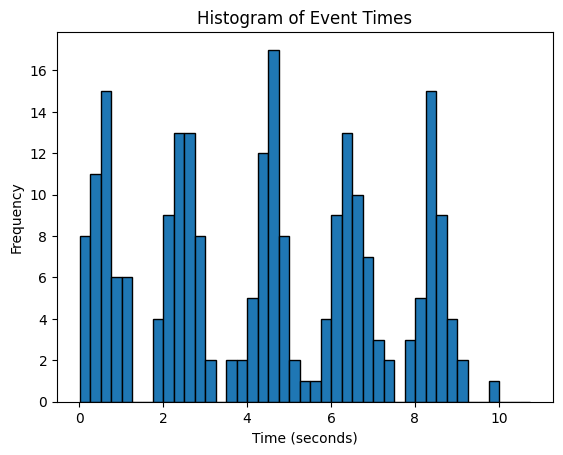

In [ ]:
def simulate_inhomogeneous_poisson(times, rate_function):
    # Integrate the rate function to get the compensator (cumulative rate function)
    compensator = np.cumsum(rate_function) * (times[1] - times[0])
    # Generate a standard Poisson process with rate 1
    n_events = np.random.poisson(compensator[-1])
    standard_poisson_events = np.sort(np.random.uniform(0, compensator[-1], n_events))

    # Apply the inverse of the cumulative rate function to the event times
    # We find where each standard Poisson event would fall in the compensator
    inhomogeneous_poisson_events = np.searchsorted(compensator, standard_poisson_events, side='left')
    inhomogeneous_poisson_events_times = times[inhomogeneous_poisson_events]

    return inhomogeneous_poisson_events_times

# Example usage:
times = np.linspace(0, 10, 10000)  # Define the time points
rate_function = np.sin(2.0*np.pi*0.5*times) * 25 + 25  # Define the rate function, ensuring it is non-negative
events = simulate_inhomogeneous_poisson(times, rate_function)
# Now 'events' contains the event times of the inhomogeneous Poisson process'

# Create a histogram
plt.hist(events, bins=np.arange(min(events), max(events)+1,0.25), edgecolor='black')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Event Times')
plt.show()

Now play with  this code. Generate a homogeneous poisson process instead (how) ? Plot the inter-event interval times - how ? this is just the histogram of times between events. What does it look like for the homogeneous process ? Why ? What about for the inhomogeneous process we started with ?